# カメラ幾何の基礎

このbookでは

- 数式と

- 図を使って

- できるだけ簡潔に

- 画像座標系とワールド座標系の関係を示します．

## 透視投影モデル式

↑はよくあるカメラレンズのモデルですよ，という認識でとりあえずよいです

（魚眼レンズや，RICOH THETAのような全天球レンズはまた違う処理をはさみます）

$$
\left(
    \begin{array}{ccc}
        u \\
        v \\
        1
    \end{array}
\right) \sim \left(
    \begin{array}{ccc}
        f_{x} & 0     & c_{x} \\
        0     & f_{y} & c_{y} \\
        0     & 0     & 1
    \end{array}
\right) \left(
    \begin{array}{ccc}
        r_{11} & r_{12} & r_{13} & t_{1} \\
        r_{21} & r_{22} & r_{23} & t_{2} \\
        r_{31} & r_{32} & r_{33} & t_{3}
    \end{array}
\right) \left(
    \begin{array}{ccc}
        X \\
        Y \\
        Z \\
        1
    \end{array}
\right) \\
\sim K \left[R \mid t\right] X
$$

$(u, v)$は画像平面上の点(pixel)

$K$はカメラの内部パラメータ行列で，

- $f_{x}, f_{y}$は焦点距離(pixel)
- $c_{x}, c_{y}$はカメラの画像中心(pixel)です．

$R$と$t$は，ワールド座標系$(X, Y, Z)$をカメラ座標系(Not pixel)の点$(x, y, z)$に変換するための同次変換行列(TF)

$$
\left(
    \begin{array}{ccc}
        x \\
        y \\
        z \\
    \end{array}
\right) = R \left(
    \begin{array}{ccc}
        X \\
        Y \\
        Z \\
    \end{array}
\right) + t
$$

3つの座標系が登場する式なので，混乱するかもしれません

下記のような流れで説明していきます

- ワールド座標系の点$(X, Y, Z)$を

- カメラ視点の座標系の点$(x, y, z)$に変換し

- 画像平面上の点$(u, v)$に変換する式

「**3D点は，画像のどの位置に写るのかを表す**」式になってます．

## from ワールド座標系(m) to カメラ座標系(m)

ROSをつかってて，いつもやっているTFの変換と一緒です

$$
\left(
    \begin{array}{ccc}
        x \\
        y \\
        z \\
    \end{array}
\right) = R \left(
    \begin{array}{ccc}
        X \\
        Y \\
        Z \\
    \end{array}
\right) + t
$$

$R$と$t$は，「カメラからみたワールド座標系の原点への変換」を表します．

いま気にしているのは，カメラからみた点の位置なので，上の式で求めます．

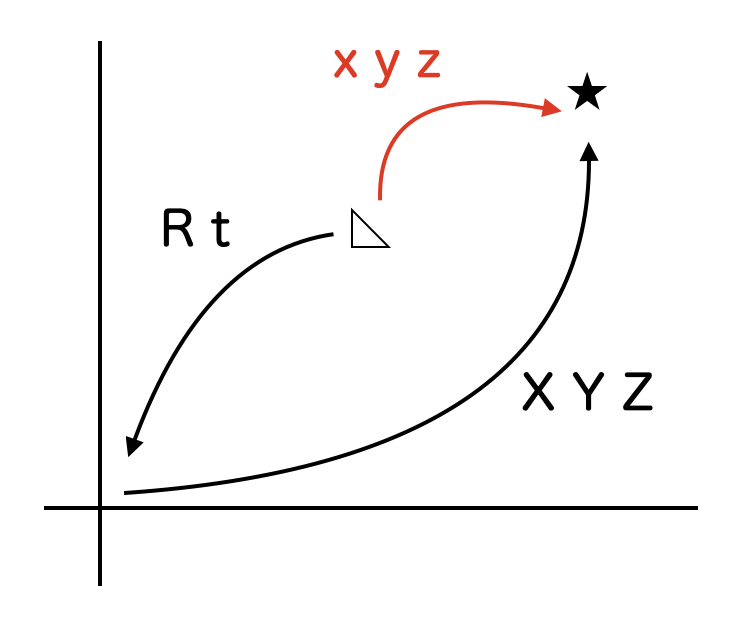

In [2]:
from IPython.display import Image
Image('./resource/world_to_camera.png')

## from カメラ座標系(m) to 画像座標系(pixel)

ここからが本題

### 焦点距離について

$f_{x}$は焦点距離(pixel)ですが，これには，

- レンズがどのくらいの角度で光を集められるのか

- 撮像素子の物理的な大きさ

が関わります．

xとyで別なパラメータになっているのは，レンズが完全に対象ではないことを意味しています．

以降の話では，xとyを意識せず書きます．

#### 撮像は，三角形の相似な関係にある

ある焦点距離F(m)で撮像素子の横幅$W$(m)のカメラがあるとします．

そして，その横幅はC(pixel)のカメラとします．

このとき，pixel単位の焦点距離は，比の計算で

$$
f = C \frac{F}{W}
$$

となります．

こんな感じで，焦点距離は撮像素子の大きさに影響を受けるため，どのくらいの画角なのかに関わるパラメータになっています．

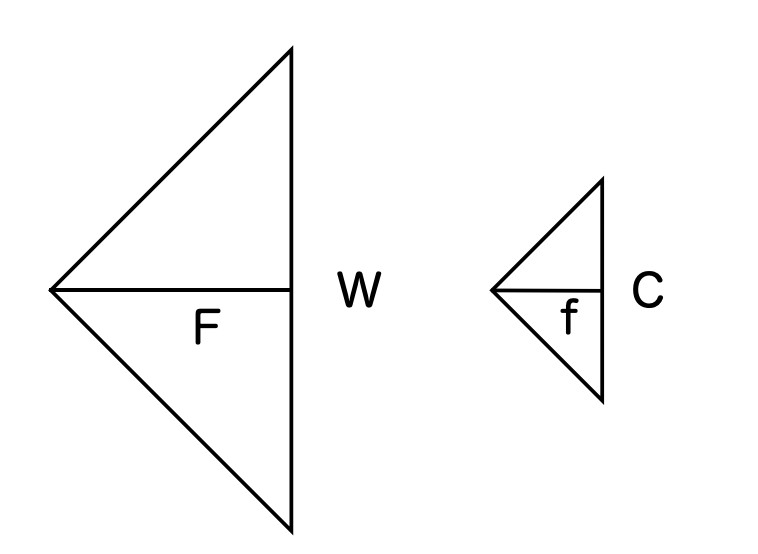

In [5]:
Image('./resource/focal_length.png')

### 画像中心について

下記2点を考慮しています．

- レンズの作製も，撮像素子との位置関係のセッティングも，神がやっているわけではないため，誤差がでます

- カメラ座標系ではレンズの中心が原点でしたが，画像座標系では画像の左上が原点なので，オフセットさせる必要がある

上記の目的を含むパラメータになっています．

### 改めて画像平面への座標変換を

カメラ座標系の点$(x, y, z)$を画像座標系$(u, v)$に変換する式です

$$
\left(
    \begin{array}{ccc}
        u \\
        v \\
        1
    \end{array}
\right) \sim \left(
    \begin{array}{ccc}
        f_{x} & 0     & c_{x} \\
        0     & f_{y} & c_{y} \\
        0     & 0     & 1
    \end{array}
\right) \left(
    \begin{array}{ccc}
        x \\
        y \\
        z
    \end{array}
\right) \\
\sim \left(
    \begin{array}{ccc}
        f_{x}x + c_{x}z \\
        f_{y}y + c_{y}z \\
        z
    \end{array}
\right)
$$

今，同次座標系なので，直交座標表現に戻すと，

$$
\left(
    \begin{array}{ccc}
        u \\
        v
    \end{array}
\right) = \left(
    \begin{array}{ccc}
        f_{x} \frac{x}{z} + c_{x} \\
        f_{y} \frac{y}{z} + c_{y}
    \end{array}
\right)
$$

図で表すと以下のような感じ

また比の計算

$$
u` = f_{x} \frac{x}{z}
$$
$$
u = u` + c_{x} = f_{x} \frac{x}{z} + c_{x}
$$

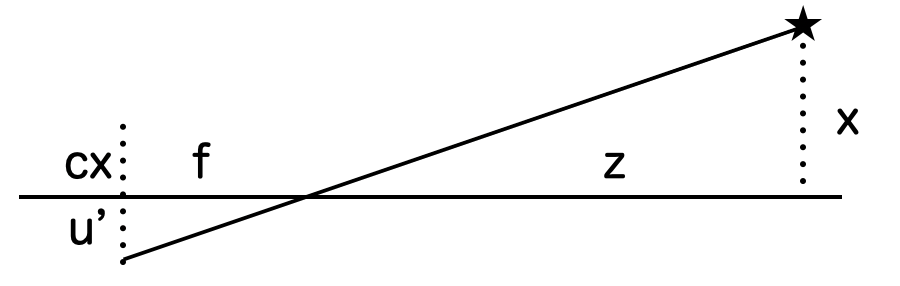

In [6]:
Image('./resource/camera_to_image.png')

## まとめ

- 任意のワールド座標系から画像座標系へ投影される関係を示しました

- 式全体でみるとなんか難しそうですが，一つずつ見ればさほど問題ないと思います

In [57]:
import numpy as np

u"""
画像の中心に点が投影されるはずの配置でトライ
"""

# (X, Y, Z) = (0, 3, 3)
world_point = np.array([[0.], [3.], [3.], [1.]])
print('world point:\n{}'.format(world_point))

camera_to_world = np.array(
    [
        [1., 0., 0., 0.],
        [0., 1., 0., -3.],
        [0., 0., 1., 0.],
    ])
print('camera to world:\n{}'.format(camera_to_world))

camera_param = np.array(
    [
        [300., 0., 360.],
        [0., 300., 240.],
        [0., 0., 1],
    ])
print('camera param:\n{}'.format(camera_param))


uv = camera_param @ camera_pose @ world_point
print('uv is:\n{}'.format(uv))
print('normalize scale uv:\n{}'.format(uv[0:2]/uv[2, 0]))

world point:
[[0.]
 [3.]
 [3.]
 [1.]]
camera to world:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -3.]
 [ 0.  0.  1.  0.]]
camera param:
[[300.   0. 360.]
 [  0. 300. 240.]
 [  0.   0.   1.]]
uv is:
[[1080.]
 [ 720.]
 [   3.]]
normalize scale uv:
[[360.]
 [240.]]
